<a href='https://colab.research.google.com/github/Keeeyaan/SIA/blob/master/Chatbot-Model.ipynb'> <img  align="left" src='https://colab.research.google.com/assets/colab-badge.svg' /></a>

In [24]:
import tensorflow as tf
import pandas as pd
import numpy as np
import nltk
import json
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model, Sequential
import matplotlib.pyplot as plt

----

## Importing the Data

In [26]:
with open('content.json') as content:
    data= json.load(content)

#getting all the data to lists
tags = []
inputs = []
responses={}

for intent in data['intents']:
  responses[intent['tag']] = intent['responses']

  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])
    
#converting to dataframe
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})
data

,inputs,tags
0,hello!,greeting
1,hi there,greeting
2,nice to meet you,greeting
3,hey,greeting
4,Good day,greeting
5,hola,greeting
6,wassup,greeting
7,Thanks!,gratitude
8,Thank you!,gratitude
9,That's helpful,gratitude


In [4]:
data['inputs']

0                                                hello!
1                                              hi there
2                                      nice to meet you
3                                                   hey
4                                              Good day
5                                                  hola
6                                                wassup
7                                               Thanks!
8                                            Thank you!
9                                        That's helpful
10                                     Awesome, thanks!
11                               Thanks for helping me!
12                                                  Bye
13                                        See you later
14                                             Goodbye!
15                                             Get lost
16                                       Till next time
17                                              

In [36]:
#removing punctuations
#import string
#data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
#data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))

----

## Pre-Processing the data

### Tokenize the data

##### Note: Keras tokenizer on default remove the punctuations

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])

In [31]:
tokenizer.word_index, train

({'of': 1,
  'the': 2,
  'uc': 3,
  'university': 4,
  'cebu': 5,
  'is': 6,
  'what': 7,
  'address': 8,
  'vision': 9,
  'mission': 10,
  'goals': 11,
  'core': 12,
  'values': 13,
  'how': 14,
  'about': 15,
  'owner': 16,
  'to': 17,
  'you': 18,
  'thanks': 19,
  'who': 20,
  'i': 21,
  'main': 22,
  'school': 23,
  'are': 24,
  'like': 25,
  'know': 26,
  "school's": 27,
  'where': 28,
  'hello': 29,
  'hi': 30,
  'there': 31,
  'nice': 32,
  'meet': 33,
  'hey': 34,
  'good': 35,
  'day': 36,
  'hola': 37,
  'wassup': 38,
  'thank': 39,
  "that's": 40,
  'helpful': 41,
  'awesome': 42,
  'for': 43,
  'helping': 44,
  'me': 45,
  'bye': 46,
  'see': 47,
  'later': 48,
  'goodbye': 49,
  'get': 50,
  'lost': 51,
  'till': 52,
  'next': 53,
  'time': 54,
  'bbye': 55,
  'founder': 56,
  'owns': 57,
  'would': 58,
  'physical': 59,
  'street': 60,
  'located': 61,
  'can': 62,
  'find': 63,
  'need': 64,
  "i'd": 65,
  "cebu's": 66,
  'campus': 67,
  'please': 68},
 [[29],
  [30, 31


### Apply Padding

In [32]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(train)

In [33]:
x_train

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 29],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 30, 31],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 32, 17, 33, 18],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 34],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 35, 36],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 37],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 38],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 19],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 39, 18],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 40, 41],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 42, 19],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 19, 43, 44, 45],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 46],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 47, 18, 48],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 49],
       [ 0,  0,  0,  0,  

### Encoding the tags

In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [35]:
y_train

array([2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8,
       8, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 7, 7, 7, 7, 7, 7,
       3, 3, 3, 3, 3, 3, 3, 3])

----

## Input Length, Output Length and Vocabulary


In [38]:
#input length
input_shape = x_train.shape[1]
print("input length:", input_shape)

#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words:", vocabulary)

#output length
output_length = le.classes_.shape[0]
print("output length:", output_length)

input length: 14
number of unique words: 68
output length: 9


----

## Creating the model


In [39]:
#creating the model
def create_model(vocabulary_size, seq_len):
    model = Sequential()
    model.add(Embedding(vocabulary_size + 1, 10, input_length=seq_len))
    model.add(LSTM(20, return_sequences=True))
    #model.add(Flatten())
    model.add(LSTM(20))
    model.add(Dense(output_length, activation='softmax'))
    
    #compiling the model
    model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(lr=0.01), metrics=['accuracy'])
    
    model.summary()
    
    return model

In [40]:
model = create_model(vocabulary, input_shape)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 14, 10)            690       
_________________________________________________________________
lstm_4 (LSTM)                (None, 14, 20)            2480      
_________________________________________________________________
lstm_5 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 189       
Total params: 6,639
Trainable params: 6,639
Non-trainable params: 0
_________________________________________________________________


In [42]:
#fit model
history = model.fit(x_train, y_train, epochs=100, verbose=1)

Epoch 1/100
52/52 [==============================] - 1s 22ms/sample - loss: 2.2050 - acc: 0.0577
Epoch 2/100
52/52 [==============================] - 0s 518us/sample - loss: 2.1908 - acc: 0.1923
Epoch 3/100
52/52 [==============================] - 0s 460us/sample - loss: 2.1780 - acc: 0.2308
Epoch 4/100
52/52 [==============================] - 0s 537us/sample - loss: 2.1643 - acc: 0.2308
Epoch 5/100
52/52 [==============================] - 0s 499us/sample - loss: 2.1356 - acc: 0.2308
Epoch 6/100
52/52 [==============================] - 0s 595us/sample - loss: 2.0689 - acc: 0.2692
Epoch 7/100
52/52 [==============================] - 0s 499us/sample - loss: 1.9995 - acc: 0.2692
Epoch 8/100
52/52 [==============================] - 0s 575us/sample - loss: 1.9143 - acc: 0.2692
Epoch 9/100
52/52 [==============================] - 0s 556us/sample - loss: 1.8691 - acc: 0.2692
Epoch 10/100
52/52 [==============================] - 0s 479us/sample - loss: 1.8494 - acc: 0.2692
Epoch 11/100
52/52 [

----

## Visualize loss and accuracy

Text(0.5, 0, 'epochs')

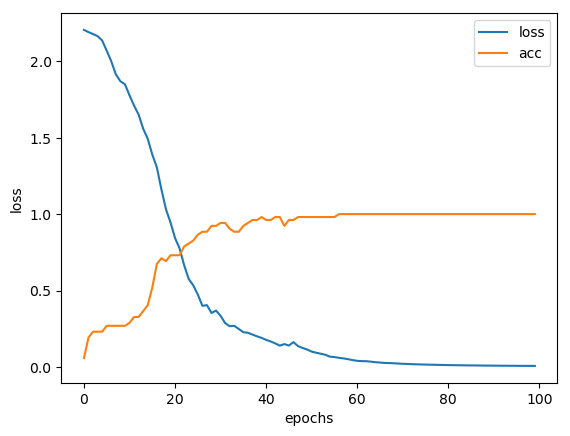

In [43]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

----

## Testing the model

In [44]:
import random
import string

while True:
  texts_p = []
  prediction_input = input('You : ')
    
  #removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)
    
  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)
    
  #getting output from model
  output = model.predict(prediction_input)
  output = output.argmax()

  #finding the right tag and predicting
  response_tag = le.inverse_transform([output])[0]

  print("SIA : ",random.choice(responses[response_tag]))
  if response_tag == "goodbye":
    break

You : hi
SIA :  Hello! How may I assist you today?
You : bye
SIA :  Bye! Come back again soon.
